# Import Necessary Libraries & Data to be used in Analysis.




In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

# Data Cleaning & Data Integrity.

In [39]:
#check a sample of the dataset.
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [40]:
#get the dimension of the dataset to know the number of columns and rows.
data.shape

(5000, 7)

In [41]:
#checking the datatype & for null values of different columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [42]:
#checking data types of different columns strictly.
data.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [43]:
#displaying column names.
data.columns

Index(['order_id', 'shop_id', 'user_id', 'order_amount', 'total_items',
       'payment_method', 'created_at'],
      dtype='object')

In [44]:
#Transforming the date column from string to date data type so that we can perform accurate analysis
data['created_at'] = pd.to_datetime(data['created_at'])
data.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

# Exploratory Data Analysis (EDA).

In [45]:
#checking unique categorical Values of the payment column
data.payment_method.value_counts()

credit_card    1735
debit          1671
cash           1594
Name: payment_method, dtype: int64

In [46]:
#checking the starting date of our transactions
data.created_at.min()

Timestamp('2017-03-01 00:08:09')

In [47]:
#checking the end date of our transactions
data.created_at.max()

Timestamp('2017-03-30 23:55:35')

In [48]:
#calculating Total Revenue of the orders.
total_revenue = data['order_amount'].sum(axis=0)
print('The Total Revernue is {}'.format(total_revenue))

The Total Revernue is 15725640


In [49]:
#calculating Total Number of the orders.
total_number_of_orders = data['total_items'].sum(axis=0)
print('The Total Number of Orders is {}'.format(total_number_of_orders))

The Total Number of Orders is 43936


In [50]:
#calculating Average Order Value(AOV).
Average_Order_Value = total_revenue / total_number_of_orders
print('The Average order value is {:0.2f}$'.format(Average_Order_Value))

The Average order value is 357.92$


In [51]:
#checking the number of orders placed under different types of payments
data.payment_method.value_counts()

credit_card    1735
debit          1671
cash           1594
Name: payment_method, dtype: int64

In [52]:
#checking the percentage of the orders placed with their respective payment method.
data['payment_method'].value_counts(normalize=True)*100

credit_card    34.70
debit          33.42
cash           31.88
Name: payment_method, dtype: float64

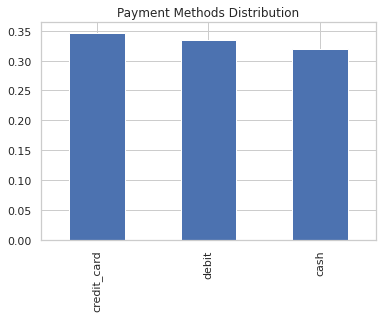

In [53]:
#plotting the percentages.
data['payment_method'].value_counts(normalize=True).plot.bar(title='Payment Methods Distribution')

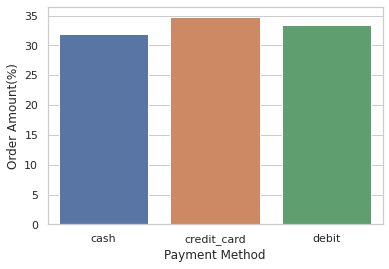

In [54]:
#Inhencing the plot and Exporting the plot for presentation.
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='payment_method', y = 'order_amount', data = data, estimator=lambda x: len(x) / len(data) *100)
ax.set(xlabel="Payment Method", ylabel = "Order Amount(%)")
# Saving the Seaborn Figure:
plt.savefig('payments.png',dpi=300,  transparent=True)